In [6]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 26.5 MB/s eta 0:00:00


In [2]:
!pip install transformers

   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ------------ --------------------------- 3.1/10.0 MB 20.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/10.0 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 18.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 15.0 MB/s eta 0:00:00


In [10]:
!set CUDA_LAUNCH_BLOCKING=1


In [38]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [2]:
import pandas as pd
df = pd.read_csv("\\Users\\sudhe\\Downloads\\archive (4)\\sentiment-emotion-labelled_Dell_tweets.csv")
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [3]:
df.info()
df.describe()
df['sentiment'].value_counts()
df['emotion'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24970 entries, 0 to 24969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24970 non-null  int64  
 1   Datetime         24970 non-null  object 
 2   Tweet Id         24970 non-null  int64  
 3   Text             24970 non-null  object 
 4   Username         24970 non-null  object 
 5   sentiment        24970 non-null  object 
 6   sentiment_score  24970 non-null  float64
 7   emotion          24970 non-null  object 
 8   emotion_score    24970 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.7+ MB


emotion
anger           7520
joy             6326
anticipation    5171
disgust         3000
sadness         1328
optimism        1225
fear             366
surprise          34
Name: count, dtype: int64

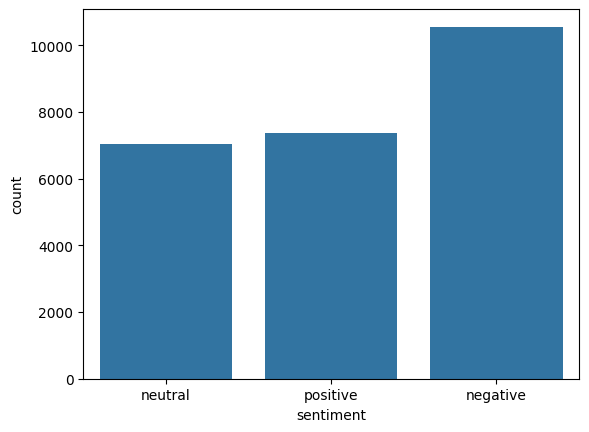

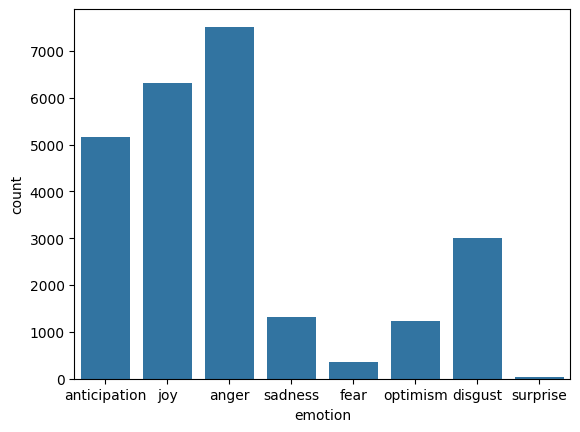

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.show()

sns.countplot(x='emotion', data=df)
plt.show()


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'@\w+', '', text)     
    text = re.sub(r'#', '', text)        
    text = re.sub(r'[^A-Za-z\s]', '', text)  
    text = text.lower() 
    tokens = word_tokenize(text)  
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_text'] = df['Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df = df.dropna(subset=['Text', 'sentiment', 'emotion'])


In [7]:
from sklearn.preprocessing import LabelEncoder

sentiment_encoder = LabelEncoder()
df['sentiment_label'] = sentiment_encoder.fit_transform(df['sentiment'])
emotion_encoder = LabelEncoder()
df['emotion_label'] = emotion_encoder.fit_transform(df['emotion'])



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_sentiment, y_test_sentiment = train_test_split(X, df['sentiment_label'], test_size=0.2, random_state=42)
X_train, X_test, y_train_emotion, y_test_emotion = train_test_split(X, df['emotion_label'], test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression

sentiment_model = LogisticRegression()
sentiment_model.fit(X_train, y_train_sentiment)

emotion_model = LogisticRegression()
emotion_model.fit(X_train, y_train_emotion)


c:\Users\sudhe\anaconda3\envs\cuda_test\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
from sklearn.metrics import classification_report

sentiment_pred = sentiment_model.predict(X_test)
print(classification_report(y_test_sentiment, sentiment_pred))

emotion_pred = emotion_model.predict(X_test)
print(classification_report(y_test_emotion, emotion_pred))


              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2065
           1       0.66      0.63      0.65      1468
           2       0.77      0.74      0.75      1461

    accuracy                           0.75      4994
   macro avg       0.74      0.74      0.74      4994
weighted avg       0.75      0.75      0.75      4994

              precision    recall  f1-score   support

           0       0.70      0.87      0.77      1464
           1       0.53      0.65      0.59      1037
           2       0.46      0.25      0.32       616
           3       1.00      0.24      0.38        68
           4       0.67      0.74      0.71      1289
           5       0.87      0.27      0.41       271
           6       0.65      0.15      0.24       240
           7       0.00      0.00      0.00         9

    accuracy                           0.64      4994
   macro avg       0.61      0.40      0.43      4994
weighted avg       0.64

c:\Users\sudhe\anaconda3\envs\cuda_test\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sudhe\anaconda3\envs\cuda_test\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sudhe\anaconda3\envs\cuda_test\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

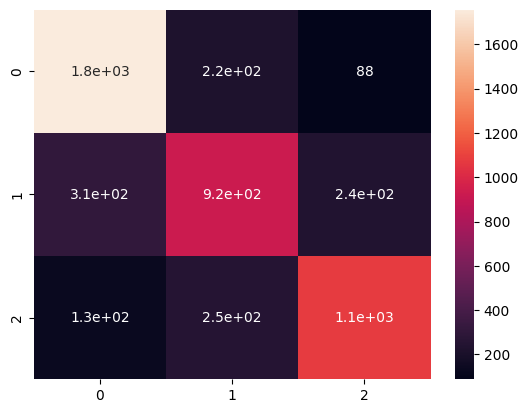

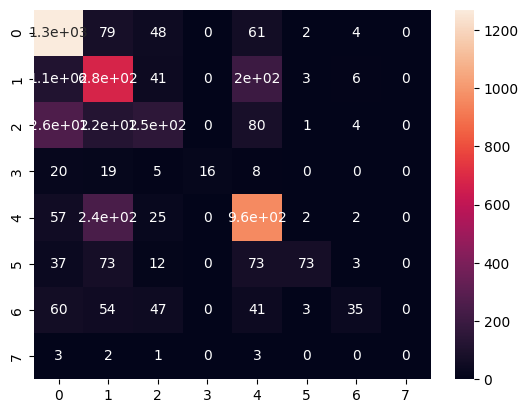

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_sentiment = confusion_matrix(y_test_sentiment, sentiment_pred)
sns.heatmap(cm_sentiment, annot=True)
plt.show()

cm_emotion = confusion_matrix(y_test_emotion, emotion_pred)
sns.heatmap(cm_emotion, annot=True)
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train_sentiment)
print(grid.best_params_)


c:\Users\sudhe\anaconda3\envs\cuda_test\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sudhe\anaconda3\envs\cuda_test\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

{'C': 1}


In [14]:
import joblib

joblib.dump(sentiment_model, 'sentiment_model.pkl')
joblib.dump(emotion_model, 'emotion_model.pkl')



['emotion_model.pkl']

In [15]:
loaded_sentiment_model = joblib.load('sentiment_model.pkl')
loaded_emotion_model = joblib.load('emotion_model.pkl')

new_tweet = vectorizer.transform(['The movie was ok, but forgettable'])
sentiment_prediction = loaded_sentiment_model.predict(new_tweet)
emotion_prediction = loaded_emotion_model.predict(new_tweet)

print(sentiment_encoder.inverse_transform(sentiment_prediction))
print(emotion_encoder.inverse_transform(emotion_prediction))


['neutral']
['joy']
